In [1]:
#https://igraph.org/python/doc/tutorial/tutorial.html
#https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4

#!pip install python-igraph
#!c:\programdata\anaconda3\python.exe -m pip install --upgrade pip
#!pip install pycairo-1.19.1-cp37-cp37m-win_amd64.whl
import igraph as ig

[3, 1, 4, 3, 2, 3, 2]


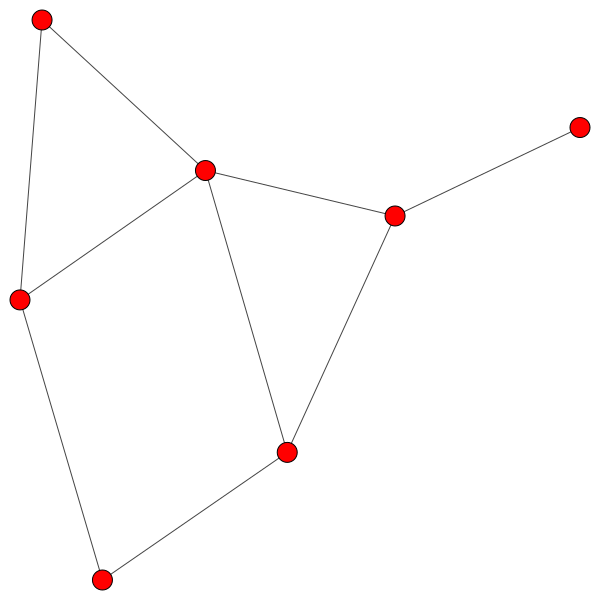

In [17]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
print(g.degree())
g.layout_sugiyama()
c=ig.Configuration()
c["general.verbose"] = True
c["plotting.wrap_labels"] = True
c["plotting.layout"] = "Sugiyama"

ig.plot(g)

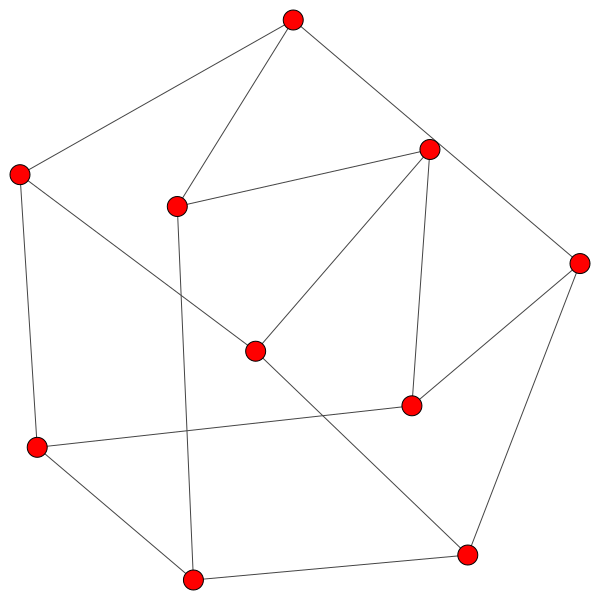

In [7]:
g = ig.Graph.Famous("petersen")
ig.plot(g)

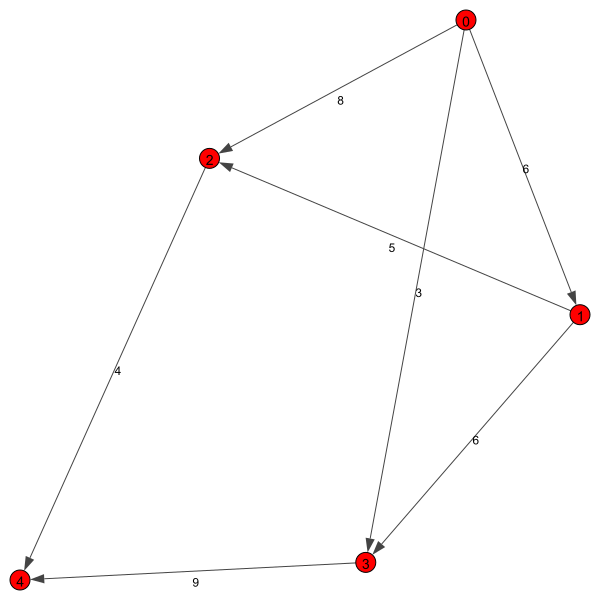

In [14]:
g = ig.Graph(directed=True)
g.add_vertices(5)
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i)
g.add_edges([(0,2),(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])
weights = [8,6,3,5,6,4,9]
g.es['weight'] = weights
g.es['label'] = weights
ig.plot(g)

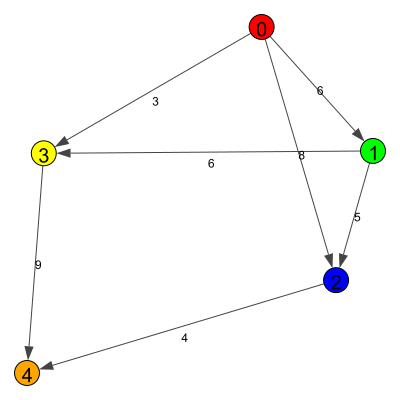

In [25]:
visual_style = {}
out_name = "graph.pdf"
visual_style["bbox"] = (400,400)
visual_style["margin"] = 27
visual_style["vertex_color"] = ["red", "green", "blue", "yellow", "orange"]
visual_style["vertex_size"] = 25
visual_style["vertex_label_size"] = 20
visual_style["edge_curved"] = False
visual_style["layout"] = g.layout_lgl()

ig.plot(g, out_name, **visual_style)

In [26]:
print("Number of vertices in the graph:", g.vcount())
print("Number of edges in the graph", g.ecount())
print("Is the graph directed:", g.is_directed())
print("Maximum degree in the graph:", g.maxdegree())
print("Adjacency matrix:\n", g.get_adjacency())

Number of vertices in the graph: 5
Number of edges in the graph 7
Is the graph directed: True
Maximum degree in the graph: 3
Adjacency matrix:
 [[0, 1, 1, 1, 0]
 [0, 0, 1, 1, 0]
 [0, 0, 0, 0, 1]
 [0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0]]


In [32]:
print(g.neighbors(0, mode='OUT'))
print(g.neighbors(0, mode='IN'))

[1, 2, 3]
[]


In [33]:
import pandas as pd
df = pd.read_excel("Relacionados.xlsx")

In [34]:
df

,Post,Rel1,Rel2,Rel3
0,"Livro – Professor, para que estudo isso?",Coleção Contém Química,O que é um podcast? É tipo rádio? Como faço pa...,Qual o papel do professor universitário?
1,Coleção Contém Química,"Livro – Professor, para que estudo isso?",O que é um podcast? É tipo rádio? Como faço pa...,A química dos sabores
2,O que é um podcast? É tipo rádio? Como faço pa...,Coleção Contém Química,"Livro – Professor, para que estudo isso?","A ciência que você vê, mas não percebe!"
3,Nojo no mundo animal,Coleção Contém Química,"Livro – Professor, para que estudo isso?",Que seja eterno enquanto dure…
4,Prêmio Nobel 2017 – Microscopia Eletrônica com...,Coleção Contém Química,Prêmio Nobel em Medicina 2018 – Imunologia e C...,[Física e Química] Prêmio Nobel premia pesquis...
...,...,...,...,...
146,O efeito Hawthorne e a nossa vontade de melhorar,Preste atenção! Neurociência explica o que voc...,Aversão à perda e efeito dotação: uma pequena ...,Se sentindo um impostor?
147,Carne caramelizada: uma receita não-enzimática,As especiarias e os aromas,O que acontece no seu corpo após tomar aquela ...,Produtos de Reações Químicas
148,Participação de animais em pesquisa,Nojo no mundo animal,Será que basta olhos para ver o arco-íris? Com...,Como matar um vírus?
149,Como saber a situação da sua cidade frente ao ...,Como medir o surto do novo coronavírus?,Máscaras contra o coronavírus: usar ou não usar?,A percepção dos brasileiros sobre a ciência


In [108]:
edges = []
    
for i in range (len(df)):
    rel = []
    rel.append(list(df[df['Post'][i] == df['Rel1']].index))
    rel.append(list(df[df['Post'][i] == df['Rel2']].index))
    rel.append(list(df[df['Post'][i] == df['Rel3']].index))


    for j in range (len(rel)):
        for k in range (len(rel[j])):
            edges.append([rel[j][k],i])
    
#print(edges)

In [124]:
g = ig.Graph(directed=True)
g.add_vertices(len(df))
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    #g.vs[i]["label"]= str(i)
    g.vs[i]["label"]= str(df["Post"][i][:20] +
                          "\n" + df["Post"][i][20:40] +
                          "\n" + df["Post"][i][40:60] +
                          "\n" + df["Post"][i][60:80])
g.add_edges(edges)

visual_style = {}
out_name = "graph.pdf"
visual_style["bbox"] = (4000,4000)
visual_style["margin"] = 100
visual_style["vertex_color"] = ["gray"]
visual_style["vertex_size"] = 120
visual_style["vertex_label_size"] = 10
visual_style["edge_curved"] = False
visual_style["edge_widht"] = 5
visual_style["layout"] = g.layout_lgl()

ig.plot(g, out_name, **visual_style);

In [94]:
print("Number of vertices in the graph:", g.vcount())
print("Number of edges in the graph", g.ecount())
print("Is the graph directed:", g.is_directed())
print("Maximum degree in the graph:", g.maxdegree())

Number of vertices in the graph: 151
Number of edges in the graph 453
Is the graph directed: True
Maximum degree in the graph: 19


In [95]:
refs = []
for i in range (len(df)):
    refs.append(len(g.neighbors(i, mode='IN')))
print(refs)

[15, 16, 8, 5, 5, 6, 8, 2, 4, 8, 7, 11, 2, 3, 5, 15, 4, 6, 6, 5, 2, 5, 3, 4, 5, 2, 5, 11, 2, 5, 4, 6, 4, 6, 3, 7, 5, 3, 6, 6, 2, 4, 10, 7, 1, 3, 5, 5, 4, 1, 1, 4, 5, 7, 2, 5, 7, 6, 6, 5, 0, 2, 1, 4, 0, 3, 3, 2, 4, 3, 1, 0, 2, 3, 4, 4, 1, 3, 3, 3, 2, 0, 0, 1, 2, 0, 0, 5, 2, 4, 2, 1, 1, 5, 5, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 3, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 3, 0, 1, 0, 0, 4, 1, 5, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0]
